In [2]:
import json

vocab_path_base = '/workspace/pj/data/vocabs/chord.json'
vocab_path_1000 = '/workspace/pj/data/vocabs/chord_bpe_1000.json'
vocab_path_10000 = '/workspace/pj/data/vocabs/chord_bpe_10000.json'
vocab_path_20000 = '/workspace/pj/data/vocabs/chord_bpe_20000.json'

with open(vocab_path_base, 'r') as file:
    vocab_base = json.load(file)
    
with open(vocab_path_1000, 'r') as file:
    vocab_1000 = json.load(file)
    
with open(vocab_path_10000, 'r') as file:
    vocab_10000 = json.load(file)
    
with open(vocab_path_20000, 'r') as file:
    vocab_20000 = json.load(file)

In [4]:
raw_data_path = '/workspace/pj/data/corpus/raw_corpus_bpe.txt'
raw_data = []
with open(raw_data_path, 'r') as f:
    for line in f:
        raw_data.append(line.strip())

In [11]:
def tokenizing_chord_seq(vocab, chord_list):
    cur = 0
    cur_chord = chord_list[0]
    candidate = 1
    group_list = []
    while(cur < len(chord_list) and candidate < len(chord_list)):
        
        if cur_chord + chord_list[candidate] in vocab:
            cur_chord += chord_list[candidate]
            candidate += 1
            continue
        else:
            group_list.append(vocab[cur_chord])
            cur_chord = chord_list[candidate]
            cur = candidate
            candidate += 1
    group_list.append(vocab[cur_chord])
        
    return group_list


def cnt_length(data, vocab, idx):
    text_seq = data[idx]
    
    if isinstance(text_seq, str):
        toks = text_seq.split()
    l_toks = len(toks)
    ratio = 4
    chord_list = []
    for idx in range(0, l_toks, ratio):
        t1, t2, t3, t4 = toks[idx : idx + 4]
        if t1[0] == 'h' or t1[0] == 'H':
            chord_list.append(t1)
            
    target_chord_seq = tokenizing_chord_seq(vocab, chord_list)
    # target_chord_seq = [i for i in range(10,110)]
    return len(target_chord_seq)


In [14]:
from tqdm import tqdm
len_base = []
len_1000 = []
len_10000 = []
len_20000 = []

for idx in tqdm(range(len(raw_data))):
    chord_len = cnt_length(raw_data, vocab_base, idx)
    len_base.append(chord_len)
    
    chord_len = cnt_length(raw_data, vocab_1000, idx)
    len_1000.append(chord_len)
    
    chord_len = cnt_length(raw_data, vocab_10000, idx)
    len_10000.append(chord_len)
    
    chord_len = cnt_length(raw_data, vocab_20000, idx)
    len_20000.append(chord_len)

  0%|          | 0/46188 [00:00<?, ?it/s]

100%|██████████| 46188/46188 [33:49<00:00, 22.75it/s]  


In [31]:
len_base.sort()
len_10000.sort()
len_20000.sort()
print(len(len_base))
print(len_base[:20])
print(len_base[-800:])
print(len_10000[-800:])
print(len_20000[-800:])

46188
[1, 1, 4, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8]
[505, 505, 505, 505, 505, 506, 506, 506, 506, 506, 506, 507, 507, 507, 507, 507, 508, 508, 508, 508, 508, 508, 509, 509, 510, 510, 510, 510, 511, 511, 511, 512, 512, 512, 512, 512, 512, 512, 513, 513, 513, 513, 513, 513, 513, 513, 513, 514, 514, 514, 514, 514, 514, 514, 514, 515, 515, 515, 515, 515, 515, 516, 516, 516, 516, 516, 517, 517, 517, 517, 518, 518, 519, 519, 520, 520, 520, 520, 521, 521, 521, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 523, 523, 523, 523, 523, 524, 524, 524, 524, 524, 524, 524, 524, 524, 525, 525, 526, 526, 527, 527, 528, 528, 528, 528, 529, 529, 529, 529, 529, 529, 529, 529, 529, 529, 529, 529, 530, 530, 530, 530, 530, 530, 530, 530, 531, 531, 531, 531, 532, 532, 532, 532, 532, 532, 532, 533, 533, 533, 533, 533, 533, 533, 534, 535, 535, 535, 535, 536, 536, 536, 536, 536, 537, 537, 537, 537, 537, 537, 538, 538, 539, 539, 540, 541, 541, 541, 541, 541, 541, 541, 542, 542, 543, 543, 54

In [35]:
for index in range(len(len_base)):
    if len_base[index] > 512:
        len_base[index] = 600
for index in range(len(len_1000)):
    if len_1000[index] > 512:
        len_1000[index] = 600
for index in range(len(len_10000)):
    if len_10000[index] > 512:
        len_10000[index] = 600
for index in range(len(len_20000)):
    if len_20000[index] > 512:
        len_20000[index] = 600

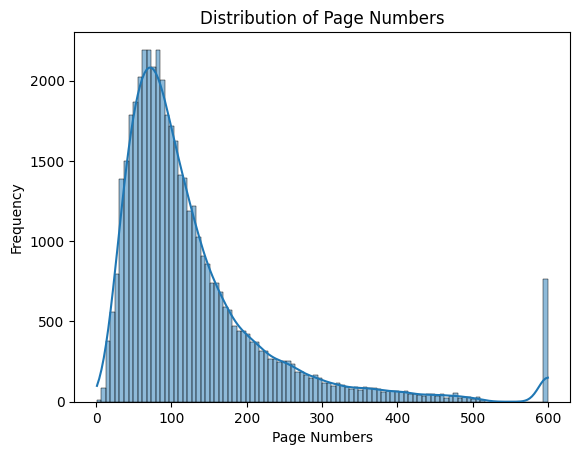

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example list of page numbers
# page_numbers = [20,20,20,20,20,100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]

# Create a histogram using Seaborn
sns.histplot(len_base, bins=100, kde=True)

# Set the title and labels
plt.title('Distribution of Page Numbers')
plt.xlabel('Page Numbers')
plt.ylabel('Frequency')

# Show the plot
plt.show()


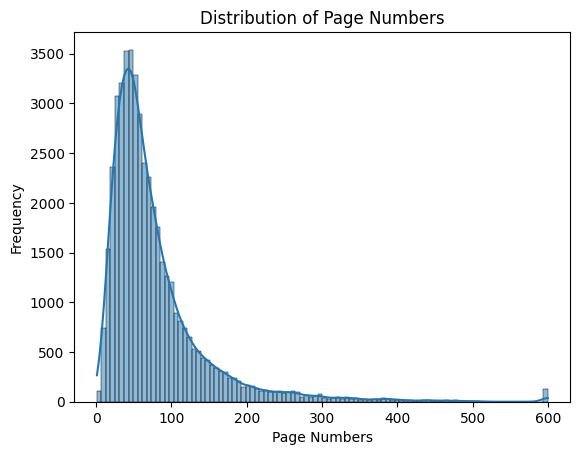

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example list of page numbers
# page_numbers = [20,20,20,20,20,100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]

# Create a histogram using Seaborn
sns.histplot(len_1000, bins=100, kde=True)

# Set the title and labels
plt.title('Distribution of Page Numbers')
plt.xlabel('Page Numbers')
plt.ylabel('Frequency')

# Show the plot
plt.show()


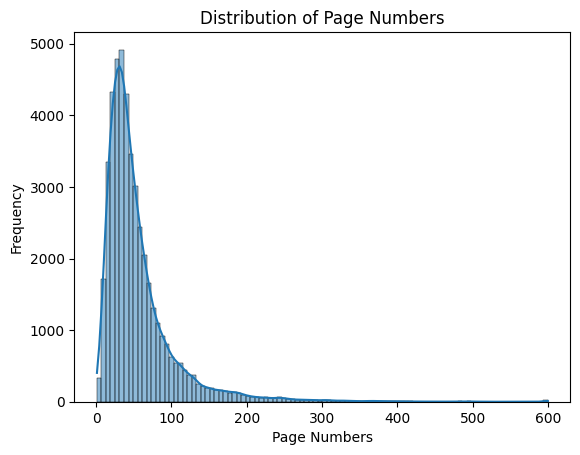

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example list of page numbers
# page_numbers = [20,20,20,20,20,100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]

# Create a histogram using Seaborn
sns.histplot(len_10000, bins=100, kde=True)

# Set the title and labels
plt.title('Distribution of Page Numbers')
plt.xlabel('Page Numbers')
plt.ylabel('Frequency')

# Show the plot
plt.show()


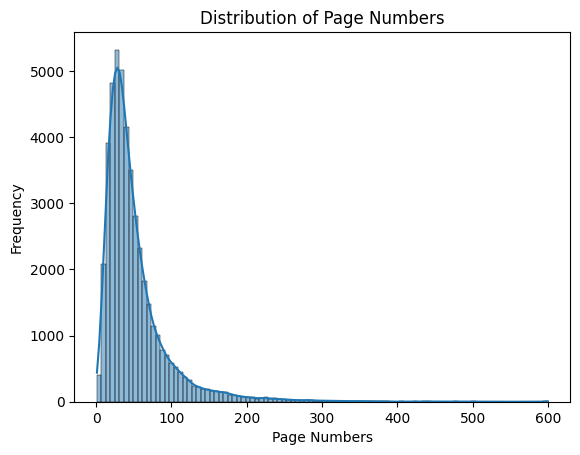

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example list of page numbers
# page_numbers = [20,20,20,20,20,100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]

# Create a histogram using Seaborn
sns.histplot(len_20000, bins=100, kde=True)

# Set the title and labels
plt.title('Distribution of Page Numbers')
plt.xlabel('Page Numbers')
plt.ylabel('Frequency')

# Show the plot
plt.show()


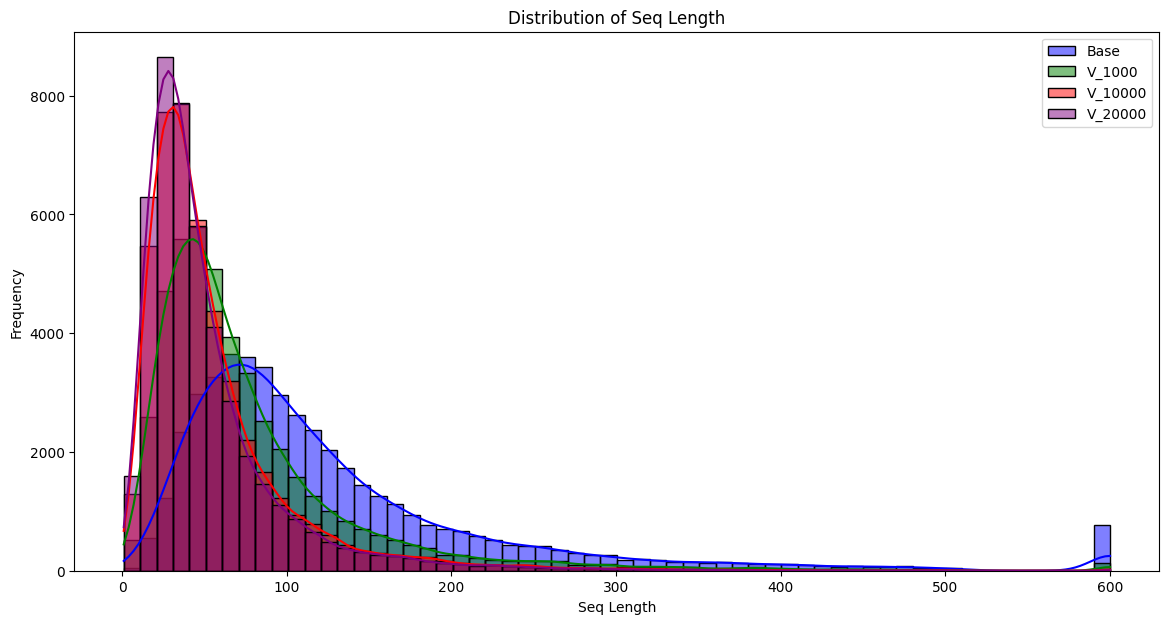

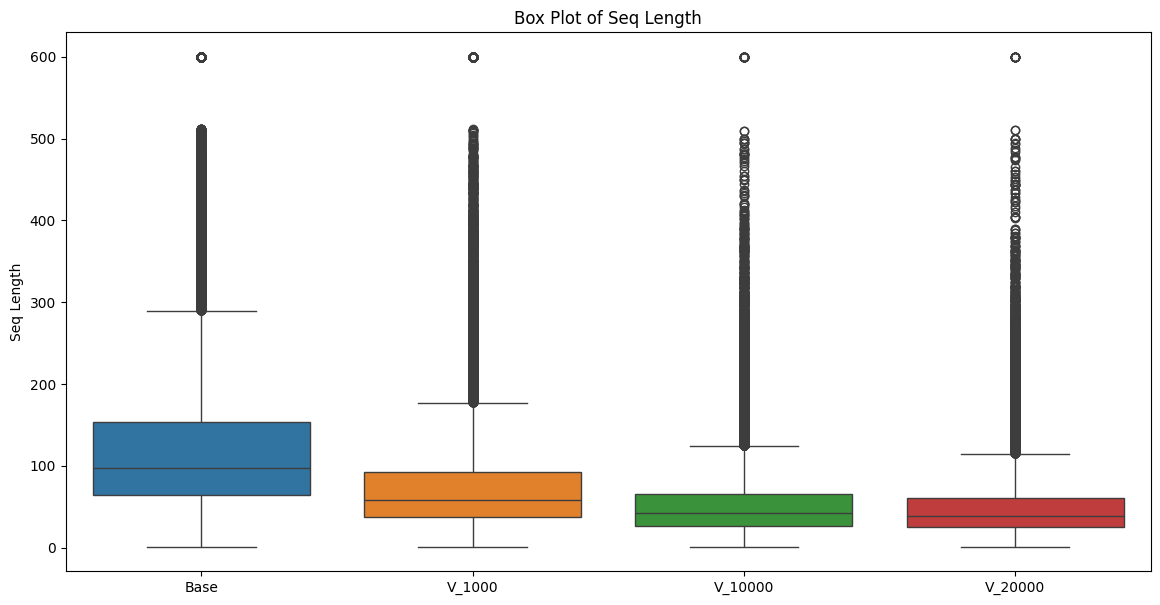

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example lists of page numbers for three groups of books
group1 = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
group2 = [120, 170, 220, 270, 320, 370, 420, 470, 520, 570, 620]
group3 = [130, 180, 230, 280, 330, 380, 430, 480, 530, 580, 630]

# Combine the lists into a single DataFrame for easier plotting
import pandas as pd
data = pd.DataFrame({
    'Base': len_base,
    'V_1000': len_1000,
    'V_10000': len_10000,
    'V_20000' : len_20000
})

# Plotting histograms
plt.figure(figsize=(14, 7))
sns.histplot(data['Base'], color='blue', kde=True, label='Base', bins=60)
sns.histplot(data['V_1000'], color='green', kde=True, label='V_1000', bins=60)
sns.histplot(data['V_10000'], color='red', kde=True, label='V_10000', bins=60)
sns.histplot(data['V_20000'], color='purple', kde=True, label='V_20000', bins=60)
plt.title('Distribution of Seq Length')
plt.xlabel('Seq Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting box plots
plt.figure(figsize=(14, 7))
sns.boxplot(data=data)
plt.title('Box Plot of Seq Length')
plt.ylabel('Seq Length')
plt.show()
